# answer question originated from unifying process

In [1]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
from gis_functions import *
from functions import *



# check original PE
## compare original data with half-way

In [ ]:
# why has karn so much Pe in plus?
import functions
d = r'C:/Users/fabrizio/Documents/R_data/PROJECTS/MASTER/DATA/KKA Kärnten NEU.xlsx'

data, trial = functions.reader(d, 'Data K', header=15, test=False)
data['EW 60']=data['EW 60'].replace('?', 0)
data['EW 60']=data['EW 60'].astype(str)
data.loc[data['EW 60'].str.contains('Bew'), 'EW 60']='0'
data.loc[data['EW 60'].str.contains('Bescheid'), 'EW 60']='0'
data.loc[data['EW 60'].str.contains('m³'), 'EW 60']='0'
data.loc[data['EW 60'].str.contains('Liter'), 'EW 60']='0'
data.loc[data['EW 60'].str.contains('nan'), 'EW 60']='0'

#perfect match. carintia had from beginning so many PEs
data['EW 60'].astype(float).sum()

In [ ]:
sub=data[['Bautyp','EW 60']]
sub['EW 60']=sub['EW 60'].astype(float).round().astype(int)
sub[sub['EW 60']<50].sum()

In [ ]:
halfway=pd.read_excel('half-way/SBG.xlsx')


In [ ]:
halfway
halfway[halfway.PE<50].PE.sum()
#halfway[halfway.EW60<50].EW60.sum()

In [ ]:
#check original PE for LowerA
d = r'C:/Users/fabrizio/Documents/R_data/PROJECTS/MASTER/DATA/KKA NÖ NEU DE final.xlsx'
data, trial = functions.reader(d, 'Data NÖ (Technol)', header=5, test=False)

#again, perfect match
data['EW60_BEWILLIGT'].astype(float).sum()

# check the unmerged 
## why some rows have not been merged?

In [ ]:
# check the not merged of KArn
data=pd.read_excel('final/not_merged_karn.xlsx')

In [ ]:
#zoom on merge key
data.loc[:,['KG', 'KG_NR']]
#one KG , and the rest is 0 that used to be NAs
#OK, differenced between half-way and final are explained

In [ ]:
#all 0 except one
data=pd.read_excel('final/not_merged_sbg.xlsx')
data.loc[:,['KG', 'KG_NR']]


# unify OEBO

In [ ]:
oebo=geopandas.read_file('final/oebo.geojson')


In [ ]:
oebo['no_nitri']=oebo.freq-oebo.NITRIFIZIERUNG

# what the fuck happened with mean_age steiermark?

In [ ]:
steyr=pd.read_excel('half-way/steyr.xlsx')

In [ ]:
steyr.sort_values('year', ascending=True)## 2077
#steyr[steyr.sort_values('year', ascending=True).year>0]## 


In [ ]:
data=geopandas.read_file('final/steyr.geojson')


In [ ]:
data[data.sort_values('mean_year', ascending=True).mean_year>0]## 


# alle the 0s disturb the mean value!! where do 0 come from ? NAs

# inserting new function : sumPE_nonitri

In [ ]:
data=geopandas.read_file('final/noe.geojson')



In [ ]:
data.columns

In [ ]:
data

In [ ]:

data[['PE_nonitri', 'freq','no_nitri', 'sum_PE']].sort_values('PE_nonitri',ascending=False)

In [ ]:

data[['PE_nonitri_y', 'freq','no_nitri', 'sum_PE']].sort_values('PE_nonitri_y',ascending=False)

# check why so many NAs in LOWER austria tech_type

In [25]:
#check original PE for LowerA
d = r'C:/Users/fabrizio/Documents/R_data/PROJECTS/MASTER/DATA/KKA NÖ NEU DE final.xlsx'
data, trial = reader(d, 'Data NÖ (Technol)', header=5, test=False)

data = cleaner(data, ["Unnamed: 0", "Unnamed: 28",
               "Unnamed: 29", "Unnamed: 30"])

#work on bautyp
bautyp = data[["Mechan.", "Biolog.", "Chemisch", "Unbek."]]
conditions_bau = [
    data["Unbek."] == 1,
    data["Mechan."] == 1,
    data["Biolog."] == 1,
    data["Chemisch"] == 1,
    (data["Biolog."] == 1) & (data["Mechan."] == 1)
]

outcomes_bau = [
    "Unbekannt", "Mech", "Bio", "Chem", "Bio"
]

data = logical_column(conditions_bau, outcomes_bau, data, 'bautyp')
data=col_dropper(data, bautyp)
data

#work on tech_type
col_list = ['3-k', 'Bel.', 'SBR', 'MBR', 'Tropf', 'RBC', 'Fest', 'Wirbel', 'BKF', 'PKA', 'Filtersack',
         'Kompost', 'Andere', 'Unbekannt']



change_colname_index(9, data,col_list)

,BEZIRK,NAME,EW60_BEWILLIGT,BEWILLIGUNGSJAHR,RECHTSWERT,HOCHWERT,Betrieb,Stillgelegt,Unbek,3-k,...,RBC,Fest,Wirbel,BKF,PKA,Filtersack,Kompost,Andere,Unbekannt,bautyp
0,Amstetten,ARA Wohnhaus Pankratz Mag. arch. Oskar und Bri...,4.0,2010,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Bio
1,Lilienfeld,ARA Wohnhaus Eberl KG Kerschenbach 1572 LF,4.0,1983,700050.0,323594.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Unbekannt
2,Amstetten,ARA Fa. Rauscher und Söhne KG Mauer bei Amstet...,100.0,1941,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Mech
3,Amstetten,ARA Wohnhaus Vogelmayer Alois KG Seitenstetten...,10.0,1962,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Mech
4,Amstetten,ARA Raiffeisenlagerhaus KG Haag Stadt 2043 AM,8.0,1996,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Unbekannt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,Wr. Neustadt-Land,ARA Eysank Lukas KG Hollenthon 4071 WB,8.0,2013,746822.0,268272.0,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Bio
5025,Wr. Neustadt-Land,ARA Schwartz Hermann jun. 3015 WB,52.0,1961,739182.0,293314.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Mech
5026,Zwettl,ARA Gretz KG Perndorf 4035 ZT,8.0,2003,658687.0,392714.0,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Bio
5027,Zwettl,ARA Böck KG Waldhausen 4908 ZT,10.0,2004,670487.0,376068.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Bio


In [26]:
data=data.reset_index()
#data=data[data['EW60_BEWILLIGT']<=50]

In [27]:
#same as from excel
len(data[data['Unbekannt']==1])

1290

In [28]:
#same as later
data[data['Unbekannt']==1]['EW60_BEWILLIGT'].sum()

38112.0

# high nmber from beginning

In [20]:
#check original PE for LowerA
d = r'C:/Users/fabrizio/Documents/R_data/PROJECTS/MASTER/DATA/KKA NÖ NEU DE final.xlsx'
data, trial = reader(d, 'Data NÖ (KKA) (Technol)', header=5, test=False)


In [21]:
data = cleaner(data, ["Unnamed: 0", "Unnamed: 28",
               "Unnamed: 29", "Unnamed: 30"])

#work on bautyp
bautyp = data[["Mechan.", "Biolog.", "Chemisch", "Unbek."]]
conditions_bau = [
    data["Unbek."] == 1,
    data["Mechan."] == 1,
    data["Biolog."] == 1,
    data["Chemisch"] == 1,
    (data["Biolog."] == 1) & (data["Mechan."] == 1)
]

outcomes_bau = [
    "Unbekannt", "Mech", "Bio", "Chem", "Bio"
]

data = logical_column(conditions_bau, outcomes_bau, data, 'bautyp')
data=col_dropper(data, bautyp)
data

#work on tech_type
col_list = ['3-k', 'Bel.', 'SBR', 'MBR', 'Tropf', 'RBC', 'Fest', 'Wirbel', 'BKF', 'PKA', 'Filtersack',
         'Kompost', 'Andere', 'Unbekannt']



change_colname_index(9, data,col_list)

,BEZIRK,NAME,EW60_BEWILLIGT,BEWILLIGUNGSJAHR,RECHTSWERT,HOCHWERT,Betrieb,Stillgelegt,Unbek,3-k,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,bautyp
0,Lilienfeld,ARA Wohnhaus Eberl KG Kerschenbach 1572 LF,4,1983,700050.0,323594.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,,,,,Unbekannt
1,Amstetten,ARA Wohnhaus Melcher Kurt KG Ertl 2479 AM,3,1975,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,,,,,Mech
2,Amstetten,ARA Wohnhaus Steiner KG Sonntagberg 2786 AM,4,1985,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,,,,,Bio
3,Amstetten,ARA Raiffeisenlagerhaus KG Haag Stadt 2043 AM,8,1996,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,,,,,Unbekannt
4,Amstetten,ARA Bachler Herbert 2120 AM,8,1966,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,,,,,Mech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,Wien Umgebung,ARA Withalm Hans 670 WU,20,1962,739782.0,345622.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mech
4537,Wr. Neustadt-Land,ARA Eysank Lukas KG Hollenthon 4071 WB,8,2013,746822.0,268272.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bio
4538,Zwettl,ARA Gretz KG Perndorf 4035 ZT,8,2003,658687.0,392714.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bio
4539,Zwettl,ARA Böck KG Waldhausen 4908 ZT,10,2004,670487.0,376068.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bio


In [24]:
len(data[data['Unbekannt']==1])

1142

In [22]:
#same as later
data[data['Unbekannt']==1]['EW60_BEWILLIGT'].sum()

12763

In [30]:
data[data['Unbek']==1]['EW60_BEWILLIGT'].sum()

4112.0

In [36]:
d = r'C:/Users/fabrizio/Documents/R_data/PROJECTS/MASTER/DATA/KKA STMK NEU DE.xlsx'

data_steyr, trial = reader(d, 'Data Stmk', header=18, test=False)
data_steyr.dropna(how='all', axis=1,inplace=True)
data_steyr=cleaner(data_steyr,['Unnamed: 0', 'ID','Typ','Subtyp','Gewässer','Unnamed: 7','lfd.Nr.'])


In [37]:
data_steyr.columns

Index(['Name', 'Status', 'Gemeinde', 'KG', 'Berechtigter', 'Postzahl',
       'Kläranlagen-Hauptsystem', 'Typbezeichnung der Anlage', 'EW', 'Jahr',
       'Mechan.', 'Biolog', 'Andere', 'Unbek.', 'Mehr-kammer', 'Durchl.',
       'SBR', 'MBR', 'Tropf', 'Tauch', 'Fest', 'PKA', 'BKF'],
      dtype='object')

In [39]:
len(data_steyr[data_steyr['Unbek.']==1])

236

In [50]:
data_steyr=data_steyr.fillna(0)
data_steyr.EW.replace(' ',0, inplace=True)  #about 1000 rows are 0 for column PE
data_steyr.EW=data_steyr.EW.astype(int)



In [51]:
data_steyr.EW.sum()

90558

In [53]:
data_steyr[data_steyr['Unbek.']==1].EW.sum()

132

# smae here using KKA sheet


# investigate tech type!

# worse categories :
    > unkown
    > lower austria in general
    > Vorarlberg mechanisch and Bel.

# start from biggest : unknown Lowe-Austria

## demonstarted that :
    > in excel  (up to 500 PE) 1290 rows are marked unknown. corresponding to 38112 PE
    > in excel (up to 50 PE ) 1142  rows are marked unknwon. corresponding to 12763 PE 


# hypothesis
    > for control source the column Unbek instead of Unbekannt was used. Unbek refers to the activity of the WWTPS (in betrieb, stillgelegt, unbek). 
    > sum of PE marked as Unbek is 4112. way more similar than other value

In [32]:
data[data['Unbek']==1]['EW60_BEWILLIGT'].sum()

4112.0

# Steyr
## most of WWTPs marked as unknown dont have PEs. means unknown PEs are way more than calculated.
    > i checked tech_type per freq: steyr was nearly perfect !! 
    > did gunther use another source for his work ???


# VBG
# checked that my results are confirmed in excel :
    > VBG mechanic in excel KKA are 59 and not 138.
    > there are no unknown in VBG KKA. 
    > 

In [3]:
data=geopandas.read_file('final/SBG.geojson')

<AxesSubplot:>

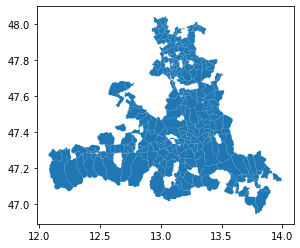

In [4]:
data.plot()